# MULTIPLE LINEAR REGRESSION

## Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd

In [2]:
# Importing advertising.csv
advertising_multi = pd.read_csv('Datasets/advertising.csv')

In [3]:
# Looking at the first five rows
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Looking at the last five rows
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
# what type of values are stored in the columns?
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Step_2: Visualising Data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


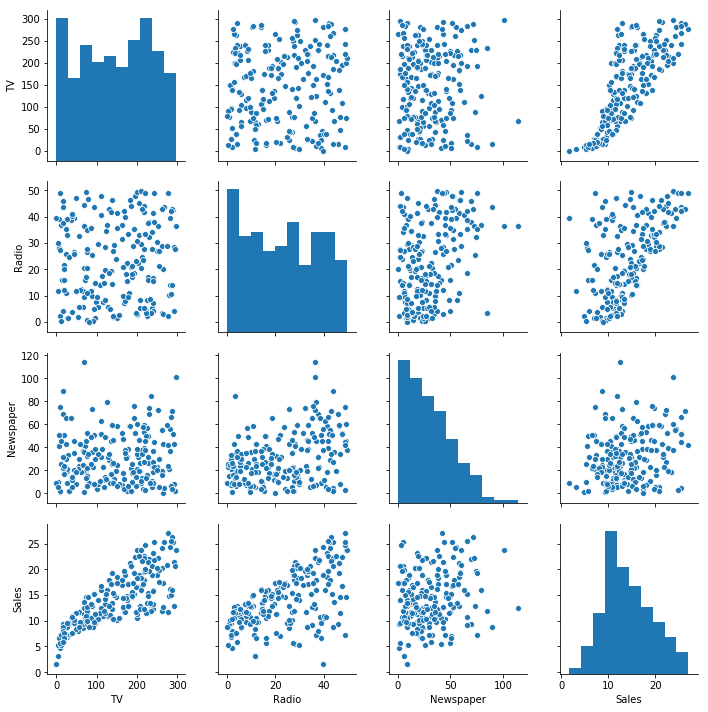

In [8]:
# Let's  plot a pair of all variables in dataframe
sns.pairplot(advertising_multi)

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


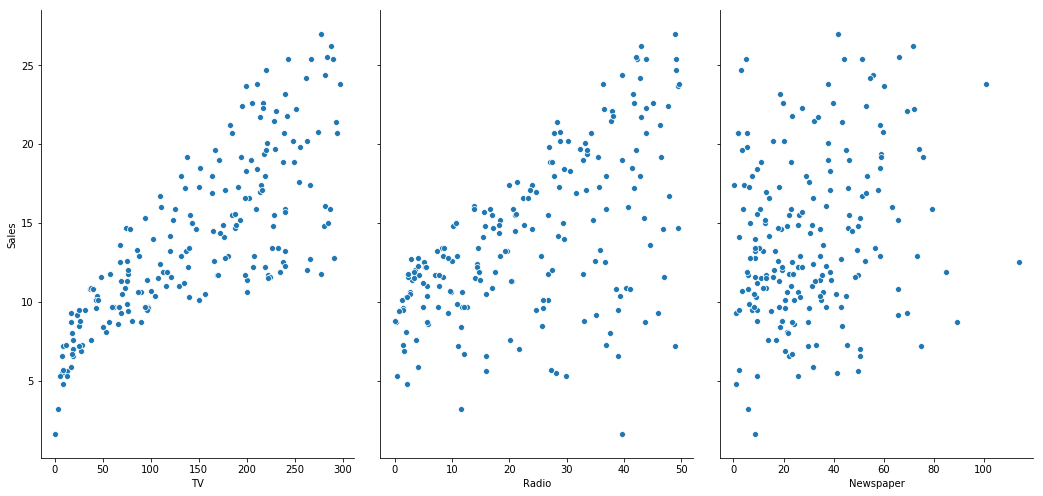

In [9]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(advertising_multi, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size=7, aspect = 0.7, kind = 'scatter')

### Step_3: Splitting the Data for Training and Testing

In [10]:
# Putting feature variable to X
X = advertising_multi[['TV', 'Radio', 'Newspaper']]

# Putting response variable to y
y = advertising_multi['Sales']

In [11]:
# random state is seed using rand no generator. It can be an integer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Step_4 : Performing Linear Regression


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step_5 : Model Evaluation

In [15]:
# print intercept
print(lr.intercept_)

2.652789668879498


In [16]:
# let's see coefficient
coeff_df = pd.DataFrame(lr.coef_, X_test.columns, columns = ['Coefficient'])
print(coeff_df)
coeff_df

           Coefficient
TV            0.045426
Radio         0.189758
Newspaper     0.004603


,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


From the above result we may infern that if TV price increases by 1 unit it will affect sales by 0.045 units.

### Step_6 : Predictions

In [17]:
# Making prediction using the model
y_pred = lr.predict(X_test)

### Step_7: Calculating Error Terms

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [19]:
print('Mean Squared Error: ', mse)
print('R Square value: ', r_squared)

Mean Squared Error:  1.850681994163694
R Square value:  0.9058622107532247


### Optional Step : Checking for P-value Using STATSMODELS


In [20]:
import statsmodels.api as sm
X_train_sm = X_train

# Unlike sklearn, statsmodel doesn't automatically fit a constant
# So you need to use the method sm.add_constant(X) in order to add a constant.

X_train_sm = sm.add_constant(X_train_sm)

#create a fitted model in one line
lr_l = sm.OLS(y_train, X_train_sm).fit()

# Print the coefficients
lr_l.params

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [21]:
print(lr_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           9.97e-66
Time:                        23:32:47   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

From the above we can see that Newspaper is insignificant.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

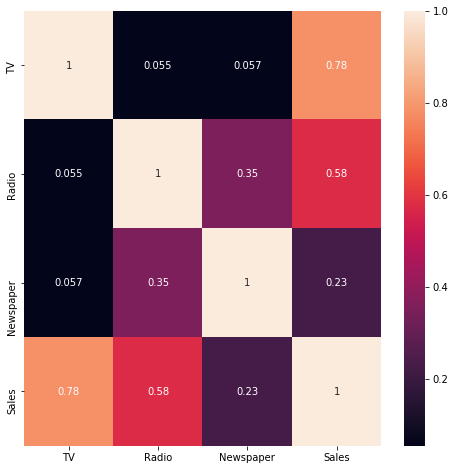

In [23]:
plt.figure(figsize = (8, 8))
sns.heatmap(advertising_multi.corr(), annot = True)

### Step_8 : Implementing the results and running the model again

From the data above, you can conclude that Newspaper is insignificant.

In [24]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV', 'Radio']]
X_test_new = X_test[['TV', 'Radio']]

In [25]:
# Model Building
lr.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
# Making predictions
y_pred_new = lr.predict(X_test_new)

Text(0, 0.5, 'Sales')

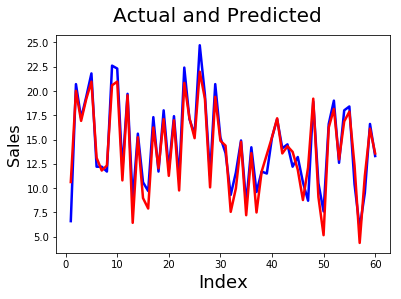

In [27]:
# Actual  values and predicted values
c = [i for i in range(1,61,1)]

fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred, color = "red", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20) #Plot Heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('Sales', fontsize = 16)                  # Y-label

Text(0, 0.5, 'y_test - y_pred')

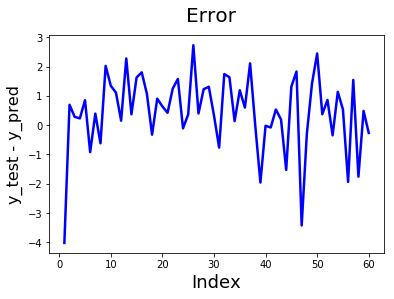

In [28]:
# Error Terms

c = [i for i in range(1,61,1)]

fig = plt.figure()
plt.plot(c, y_test - y_pred, color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error', fontsize = 20) #Plot Heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('y_test - y_pred', fontsize = 16)                  # Y-label

Text(0, 0.5, 'Sales(New)')

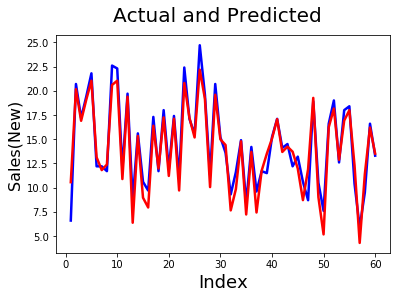

In [29]:
# Actual  values and predicted values
c = [i for i in range(1,61,1)]

fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred_new, color = "red", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20) #Plot Heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('Sales(New)', fontsize = 16)                  # Y-label

Text(0, 0.5, 'y_test - y_pred (New)')

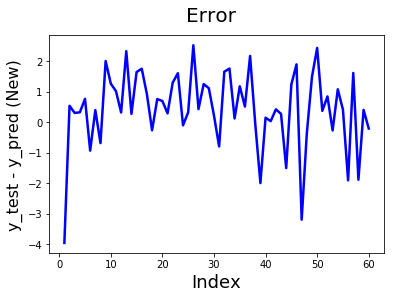

In [30]:
# Error Terms

c = [i for i in range(1,61,1)]

fig = plt.figure()
plt.plot(c, y_test - y_pred_new, color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error', fontsize = 20) #Plot Heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('y_test - y_pred (New)', fontsize = 16)                  # Y-label

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [32]:
print('Mean Squared Error: ', mse)
print('R Square value: ', r_squared)

Mean Squared Error:  1.784740052090281
R Square value:  0.909216449171822


In [33]:
X_train_final = X_train_new

# Unlike sklearn, statsmodel doesn't automatically fit a constant
# So you need to use the method sm.add_constant(X) in order to add a constant.

X_train_final = sm.add_constant(X_train_final)

#create a fitted model in one line
lr_final = sm.OLS(y_train, X_train_final).fit()

# Print the coefficients
lr_final.params

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [34]:
print(lr_final.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.891   
Dependent Variable: Sales            AIC:                568.0516
Date:               2019-06-29 23:32 BIC:                576.8765
No. Observations:   140              Log-Likelihood:     -281.03 
Df Model:           2                F-statistic:        568.8   
Df Residuals:       137              Prob (F-statistic): 4.46e-67
R-squared:          0.893            Scale:              3.3149  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    2.7190      0.3678     7.3924    0.0000    1.9917    3.4464
TV       0.0455      0.0017    27.3684    0.0000    0.0422    0.0488
Radio    0.1925      0.0102    18.8597    0.0000    0.1723    0.2127
-----------------------------------------------------------------
Omnibus: 

In [35]:
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           4.46e-67
Time:                        23:32:48   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

### Model Refinement Using RFE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [36]:
from sklearn.feature_selection import RFE

In [37]:
rfe = RFE(lr, 2)


In [38]:
rfe = rfe.fit(X_train, y_train)


In [39]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


### Simple Linear Regression: Newspaper(X) and Sales(y)

In [41]:
import pandas as pd 
import numpy as np

#Importing dataset 

advertising_multi = pd.read_csv('Datasets/advertising.csv')
x_news = advertising_multi['Newspaper']
y_news = advertising_multi['Sales']

#Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                   train_size = 0.7, 
                                                   random_state = 100)

#reqd only in simple LR 
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]


lr1 = LinearRegression()

lr1.fit(X_train, y_train)

y_pred1 = lr1.predict(X_test)

mse = mean_squared_error(y_test, y_pred1)
r_squared = r2_score(y_test, y_pred1)

#Printing mean square error and R square value

print('Mean Squared Error: ', mse)
print('R Square value: ', r_squared)

Mean Squared Error:  22.783129716276214
R Square value:  -0.1588989736629216


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## SECOND CASE STUDY

## Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Importing and Understanding Data

In [42]:
import pandas as pd
import numpy as np

In [43]:
# Importing Housing.csv
housing = pd.read_csv("Datasets/Housing.csv")


In [44]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


### Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [47]:
# Converting yes to 1 an No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no':0}) 
housing['basement'] = housing['basement'].map({'yes': 1, 'no':0}) 
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no':0}) 
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no':0}) 
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no':0}) 

In [48]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.

In [49]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'])

In [50]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [51]:
# don't need 3 columns 
# can use drop_first = True to drop the first column from status df
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

In [52]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [53]:
# Adding the result to master dataframe
housing = pd.concat([housing, status], axis = 1)

In [54]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [55]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [56]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [57]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [58]:
housing['bratio'] = housing['bathrooms']/housing['bedrooms']

In [59]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [60]:
# defining a normalization function
def normalize (x):
    return ( (x - np.min(x))/ (max(x) - min(x)))

housing = housing.apply(normalize)

### Splitting Data into Training and Testing Sets

In [61]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bratio'],
      dtype='object')

In [62]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bratio']]

y = housing['price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state =100)

### Building a linear model

In [64]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

lm_l = sm.OLS(y_train, X_train).fit()

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
print(lm_l.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.673    
Dependent Variable: price            AIC:                -736.8051
Date:               2019-06-29 23:33 BIC:                -673.7203
No. Observations:   381              Log-Likelihood:     384.40   
Df Model:           15               F-statistic:        53.12    
Df Residuals:       365              Prob (F-statistic): 4.56e-82 
R-squared:          0.686            Scale:              0.0081248
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0603   0.0586  1.0286 0.3043 -0.0550  0.1755
area                0.5745   0.1341  4.2853 0.0000  0.3109  0.8381
bedrooms           -0.0587   0.0929 -0.6315 0.5281 -0.2414  0.1241
bathrooms           0.2336   0.1264  1.8486 0.0653 -0.0149  0.4821
stories      

In [66]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           4.56e-82
Time:                        23:33:30   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

#### Checking VIF

In [67]:
# VIF is Variance Infation Factor
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns=['Var', 'Vif'])
    x_vars = input_data.drop([dependent_col], axis = 1)
    xvar_names = x_vars.columns
    
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace = False)

In [68]:
# Calculating vif values
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


### Correlation matrix

In [69]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

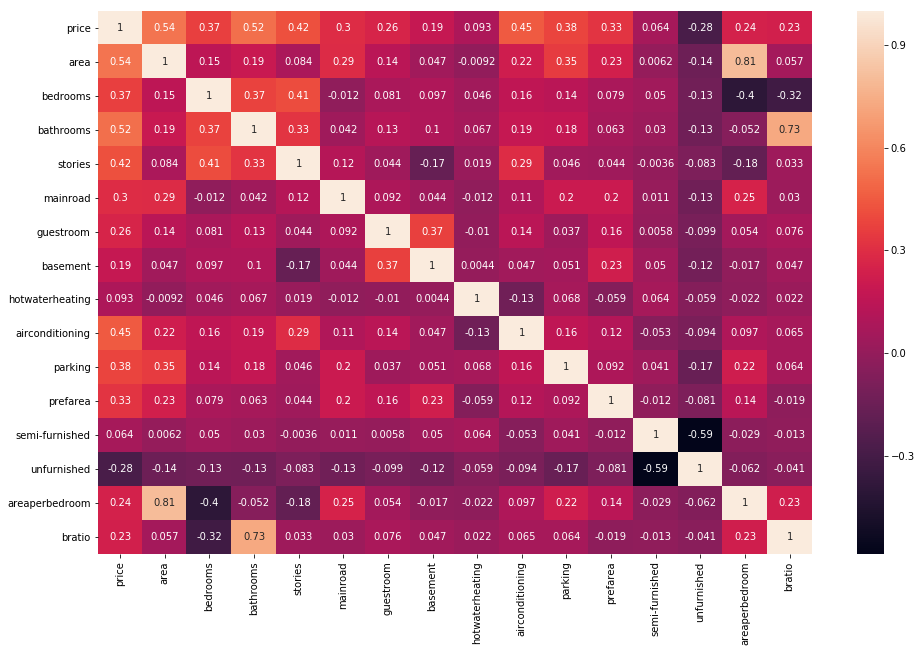

In [70]:
# Let's see the correlation matrix
plt.figure(figsize = (16,10))
sns.heatmap(housing.corr(), annot=True)

#### Dropping the Variable and Updating the Model

In [71]:
# Dropping highly correlated variable and insignificant variables
X_train = X_train.drop('bratio', 1)

In [72]:
lm_2 = sm.OLS(y_train, X_train).fit()

In [73]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           6.46e-83
Time:                        23:33:33   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [74]:
print(lm_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.674    
Dependent Variable: price            AIC:                -738.6198
Date:               2019-06-29 23:33 BIC:                -679.4778
No. Observations:   381              Log-Likelihood:     384.31   
Df Model:           14               F-statistic:        57.03    
Df Residuals:       366              Prob (F-statistic): 6.46e-83 
R-squared:          0.686            Scale:              0.0081065
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0799   0.0357  2.2392 0.0257  0.0097  0.1500
area                0.5483   0.1186  4.6221 0.0000  0.3150  0.7815
bedrooms           -0.0845   0.0699 -1.2094 0.2273 -0.2218  0.0529
bathrooms           0.2850   0.0328  8.6863 0.0000  0.2205  0.3495
stories      

#### Dropping the Variable and Updating the Model

In [75]:
# Calculating vif values
vif_cal(input_data=housing.drop(['bratio'], axis = 1), dependent_col="price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [76]:
# Dropping highly correlated variable and insignificant variables
X_train = X_train.drop('bedrooms', 1)

In [77]:
lm_3 = sm.OLS(y_train, X_train).fit()

In [78]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           1.66e-83
Time:                        23:33:34   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [79]:
print(lm_3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.673    
Dependent Variable: price            AIC:                -739.1004
Date:               2019-06-29 23:33 BIC:                -683.9012
No. Observations:   381              Log-Likelihood:     383.55   
Df Model:           13               F-statistic:        61.23    
Df Residuals:       367              Prob (F-statistic): 1.66e-83 
R-squared:          0.684            Scale:              0.0081167
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0427   0.0181  2.3621 0.0187  0.0071  0.0782
area                0.4326   0.0702  6.1645 0.0000  0.2946  0.5706
bathrooms           0.2814   0.0327  8.6063 0.0000  0.2171  0.3457
stories             0.1005   0.0192  5.2237 0.0000  0.0627  0.1384
mainroad     

In [80]:
# Calculating vif values
vif_cal(input_data=housing.drop(["bedrooms", "bratio"], axis = 1), dependent_col="price")

,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


#### Dropping the Variable and Updating the Model

In [81]:
# Dropping highly correlated variable and insignificant variables
X_train = X_train.drop('areaperbedroom', 1)

In [82]:
lm_4 = sm.OLS(y_train, X_train).fit()

In [83]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           2.35e-83
Time:                        23:33:36   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [84]:
print(lm_4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.670    
Dependent Variable: price            AIC:                -735.9177
Date:               2019-06-29 23:33 BIC:                -684.6613
No. Observations:   381              Log-Likelihood:     380.96   
Df Model:           12               F-statistic:        65.20    
Df Residuals:       368              Prob (F-statistic): 2.35e-83 
R-squared:          0.680            Scale:              0.0082055
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0313   0.0174  1.7948 0.0735 -0.0030  0.0655
area                0.3008   0.0386  7.7994 0.0000  0.2250  0.3767
bathrooms           0.2947   0.0323  9.1141 0.0000  0.2311  0.3582
stories             0.1178   0.0177  6.6435 0.0000  0.0829  0.1527
mainroad     

In [85]:
# Calculating vif values
vif_cal(input_data=housing.drop(["areaperbedroom", "bedrooms", "bratio"], axis = 1), dependent_col="price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


#### Dropping the Variable and Updating the Model

In [86]:
# Dropping highly correlated variable and insignificant variables
X_train = X_train.drop('semi-furnished', 1)

In [87]:
lm_5 = sm.OLS(y_train, X_train).fit()

In [88]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           2.73e-84
Time:                        23:33:38   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [89]:
print(lm_5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.671    
Dependent Variable: price            AIC:                -737.9130
Date:               2019-06-29 23:33 BIC:                -690.5994
No. Observations:   381              Log-Likelihood:     380.96   
Df Model:           11               F-statistic:        71.31    
Df Residuals:       369              Prob (F-statistic): 2.73e-84 
R-squared:          0.680            Scale:              0.0081834
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0319   0.0149  2.1423 0.0328  0.0026  0.0611
area                0.3006   0.0383  7.8508 0.0000  0.2253  0.3758
bathrooms           0.2947   0.0323  9.1324 0.0000  0.2313  0.3582
stories             0.1178   0.0177  6.6538 0.0000  0.0830  0.1526
mainroad     

In [90]:
# Calculating vif values
vif_cal(input_data=housing.drop(["areaperbedroom", "bedrooms", "semi-furnished", "bratio"], axis = 1), dependent_col="price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


#### Dropping the Variable and Updating the Model

In [91]:
# Dropping highly correlated variable and insignificant variables
X_train = X_train.drop('basement', 1)

In [92]:
lm_6 = sm.OLS(y_train, X_train).fit()

In [93]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           3.13e-84
Time:                        23:33:40   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [94]:
print(lm_6.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.667    
Dependent Variable: price            AIC:                -735.0258
Date:               2019-06-29 23:33 BIC:                -691.6550
No. Observations:   381              Log-Likelihood:     378.51   
Df Model:           10               F-statistic:        77.18    
Df Residuals:       370              Prob (F-statistic): 3.13e-84 
R-squared:          0.676            Scale:              0.0082667
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0390   0.0146  2.6700 0.0079  0.0103  0.0677
area                0.2990   0.0385  7.7716 0.0000  0.2233  0.3746
bathrooms           0.3028   0.0322  9.3968 0.0000  0.2394  0.3661
stories             0.1081   0.0172  6.2773 0.0000  0.0743  0.1420
mainroad     

In [95]:
# Calculating vif values
vif_cal(input_data=housing.drop(["basement", "areaperbedroom", "bedrooms", "semi-furnished", "bratio"], axis = 1), dependent_col="price")

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


#### Assessment  question
#### Design four models by dropping all the variables one by one with high vif (>5). Then, compare the results.

### Making Predictions Using the Final Model

#### Prediction with Model 6

In [96]:
# Adding constt variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [97]:
# Creating X_test_m6 df by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(["basement", "areaperbedroom", "bedrooms", "semi-furnished", "bratio"], axis = 1)

In [98]:
# Making predictions
y_pred_m6 = lm_6.predict(X_test_m6)

### Model Evaluation

Text(0, 0.5, 'Hosuign Price')

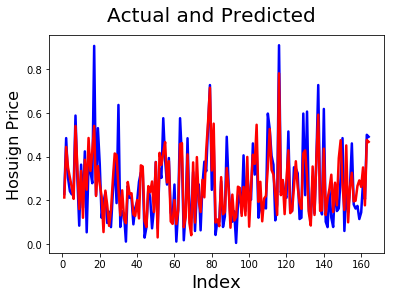

In [99]:
# Actual vs Predicted
# Actual  values and predicted values
c = [i for i in range(1,165,1)]

fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred_m6, color = "red", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20) #Plot Heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('Hosuign Price', fontsize = 16)             # Y-label

Text(0, 0.5, 'y_pred')

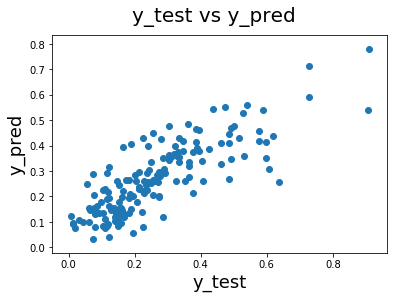

In [100]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle("y_test vs y_pred", fontsize = 20)
plt.xlabel("y_test", fontsize =18)
plt.ylabel("y_pred", fontsize =18)


Text(0, 0.5, 'y_test - y_pred')

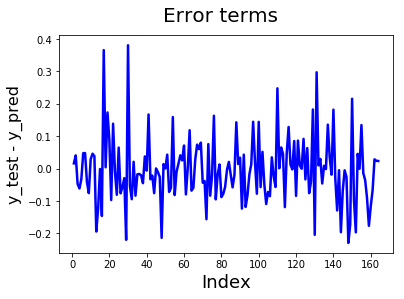

In [101]:
# Error Terms
fig = plt.figure()
c = [i for i in range(1,165,1)]

plt.plot(c, y_test - y_pred_m6, color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error terms', fontsize = 20)          #Plot Heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('y_test - y_pred', fontsize = 16)  # Y-label

Text(0, 0.5, 'Index')

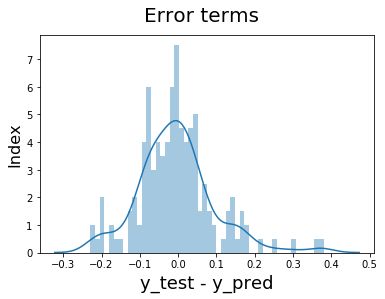

In [102]:
fig = plt.figure()

sns.distplot((y_test - y_pred_m6), bins = 50)
fig.suptitle('Error terms', fontsize = 20)          #Plot Heading
plt.xlabel('y_test - y_pred', fontsize = 18)                  # X-label
plt.ylabel('Index', fontsize = 16)  # Y-label

In [103]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_m6)))
print("R squared value", r2_score(y_test, y_pred_m6))

RMSE 0.10001092336807833
R squared value 0.660134403021964


## RFE METHOD FOR EARLIER CASE

#### Importing and Understanding Data

### Model Selection using RFE(HOUSING CASE STUDY)

In [105]:
import pandas as pd
import numpy as np

In [108]:
housing = pd.read_csv('Datasets/Housing.csv')

In [109]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [110]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [111]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


#### Data Preparation

In [112]:
# Converting yes to 1 an No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no':0}) 
housing['basement'] = housing['basement'].map({'yes': 1, 'no':0}) 
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no':0}) 
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no':0}) 
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no':0}) 

In [113]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [114]:
# Adding the result to master dataframe
housing = pd.concat([housing, status], axis = 1)

In [115]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

##### Creating a new variable

In [116]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [117]:
housing['bratio'] = housing['bathrooms']/housing['bedrooms']

#### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [118]:
# defining a normalization function
def normalize (x):
    return ( (x - np.min(x))/ (max(x) - min(x)))

housing = housing.apply(normalize)

#### Splitting data into training and testing sets

In [119]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bratio']]

y = housing['price']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state =100)

#### RFE

In [121]:
#  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model  import LinearRegression

In [122]:
lm = LinearRegression()
rfe = RFE(lm, 9)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)


[ True False  True  True  True False False  True  True False  True False
 False  True  True]
[1 3 1 1 1 4 6 1 1 2 1 7 5 1 1]


In [123]:
col = X_train.columns[rfe.support_]

#### Building model using sklearn

In [124]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [125]:
# Adding a constt variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [126]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [127]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     80.14
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           1.88e-81
Time:                        23:34:03   Log-Likelihood:                 369.54
No. Observations:                 381   AIC:                            -719.1
Df Residuals:                     371   BIC:                            -679.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0139      0.021     

In [128]:
print(lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.652    
Dependent Variable: price            AIC:                -719.0812
Date:               2019-06-29 23:34 BIC:                -679.6532
No. Observations:   381              Log-Likelihood:     369.54   
Df Model:           9                F-statistic:        80.14    
Df Residuals:       371              Prob (F-statistic): 1.88e-81 
R-squared:          0.660            Scale:              0.0086420
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0139   0.0212  0.6541 0.5134 -0.0278  0.0555
area                0.7022   0.1295  5.4206 0.0000  0.4475  0.9569
bathrooms           0.1718   0.0977  1.7593 0.0793 -0.0202  0.3639
stories             0.0814   0.0188  4.3214 0.0000  0.0443  0.1184
mainroad     

In [129]:
# Calculating Vif value
vif_cal(input_data=housing.drop(['area', 'bedrooms', 'stories', 'basement', 'semi-furnished', 'areaperbedroom'], axis=1), dependent_col="price")

,Var,Vif
8,bratio,6.21
1,mainroad,4.66
0,bathrooms,2.78
5,parking,1.82
4,airconditioning,1.59
7,unfurnished,1.44
6,prefarea,1.41
2,guestroom,1.28
3,hotwaterheating,1.08


### Making Predictions

In [130]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

### Model Evaluation

In [131]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Housing Price')

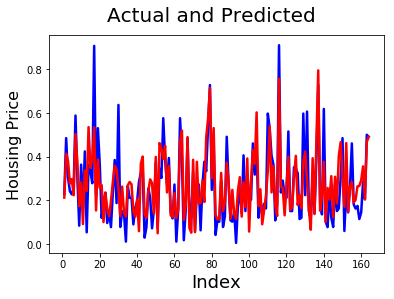

In [132]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,165,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

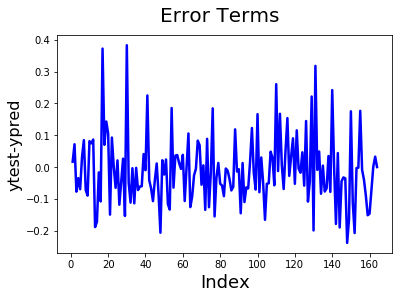

In [133]:
# Error terms
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'y_pred')

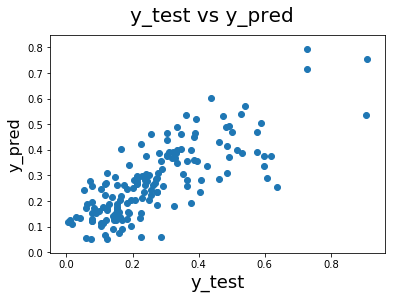

In [134]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Index')

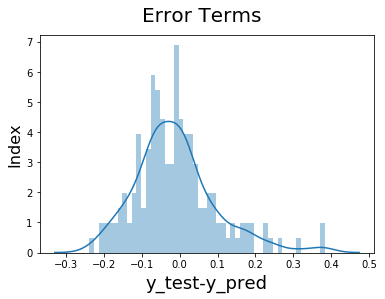

In [135]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [136]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared value :', np.sqrt(metrics.r2_score(y_test, y_pred)))

RMSE : 0.1082035253813171
R squared value : 0.7759975370261453
